<a href="https://colab.research.google.com/github/gourjyotsana/Airline-Passenger-Referral-Prediction--Third-Capstone/blob/main/Individual_notebook_Airline_Passanger_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data includes airline reviews from 2006 to 2019 for popular airlines around the world withmultiple choice and free text questions. Data is scraped in Spring 2019. The main objectiveis to predict whether passengers will refer the airline to their friends.**

#**Feature descriptions briefly as follows:**
* **airline: Name of the airline.**

* **overall: Overall point is given to the trip between 1 to 10.**

* **author: Author of the trip**

* **reviewdate: Date of the Review customer**

* **review: Review of the customers in free text format**

* **aircraft: Type of the aircraft**

* **travellertype: Type of traveler (e.g. business, leisure)**

* **cabin: Cabin at the flight**

* **date flown: Flight date**

* **seatcomfort: Rated between 1-5**

* **cabin service: Rated between 1-5**

* **foodbev: Rated between 1-5**

* **entertainment: Rated between 1-5**

* **groundservice: Rated between 1-5**

* **valueformoney: Rated between 1-5**

* **recommended: Binary, target variable.**

# **Loading Dataset and Importing Modules**


In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

import lightgbm

import warnings
warnings.filterwarnings('ignore')

#**Reading the Dataset**

In [2]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset from drive 
airline_df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

#**Understand More About The Data**

In [4]:
#top_five_rows_of_data
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#bottom five rows of data 
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
#shape of the data
airline_df.shape

(131895, 17)

we have 17 columns and 131895 rows in our data.

In [7]:
#getting all the columns
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [8]:
#checking details of the data
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [9]:
#print the unique value
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

#**Duplicate values**

In [10]:
#counting  number of duplicated values 
airline_df.duplicated().sum()

70711

In [11]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [12]:
airline_df.duplicated().sum()

0

#**Droping Unnecessary columns**

In [13]:
#droping the columns from data which are not for our use
airline_df = airline_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,airline,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,NaN,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,NaN,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,NaN,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


Reason of droping columns--

* Airline - Not related to our problem.
* Author - Not related to our problem.
* Review_date - Not needed for building a model.
* Route - Not needed for building a model.
* Date_flown - Not needed for building a model.
* Customer_review - As it is related to overall review from my datasets.

# **Null Values**

In [14]:
airline_df.isnull().sum()

airline                1
overall             1783
aircraft           42696
traveller_type     23644
cabin               2479
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

From number of null value counts,we can conclude that the dataset contains null values.Aircraft column has highest number of null values. 

In [15]:
#percetage of null values from dataset
airline_df.isnull().sum()/len(airline_df)*100

airline             0.001634
overall             2.914161
aircraft           69.782950
traveller_type     38.644090
cabin               4.051713
seat_comfort        8.127942
cabin_service       8.080544
food_bev           20.990782
entertainment      34.247516
ground_service     39.250458
value_for_money     3.035107
recommended         2.325771
dtype: float64

Droping the aircraft column from data as it have highest null values.

In [16]:
airline_df = airline_df.drop(['aircraft'],axis = 1)

On the basis of null value percentage we divide our data in two parts-

* high_null = columns which have high percentage of null values.
* low_null = columns which have low percentage of null values.

In [17]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [18]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [19]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

Imputed null values by Quantile-1 for the columns have low null value percentage.

In [20]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [21]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_df,col)

Imputed null values by Median Imputaion for the columns have high percetage.

In [22]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


Now we are left with null values in **traveller_type , cabin , recommeded** column.

In [23]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [24]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [25]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

Filling **traveller_type** column with **Mode Imputation** 

**cabin** column with **Forward fill method.**

In [26]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


#**Exploratory Data Analysis And Visualization**

#Correlation between different features

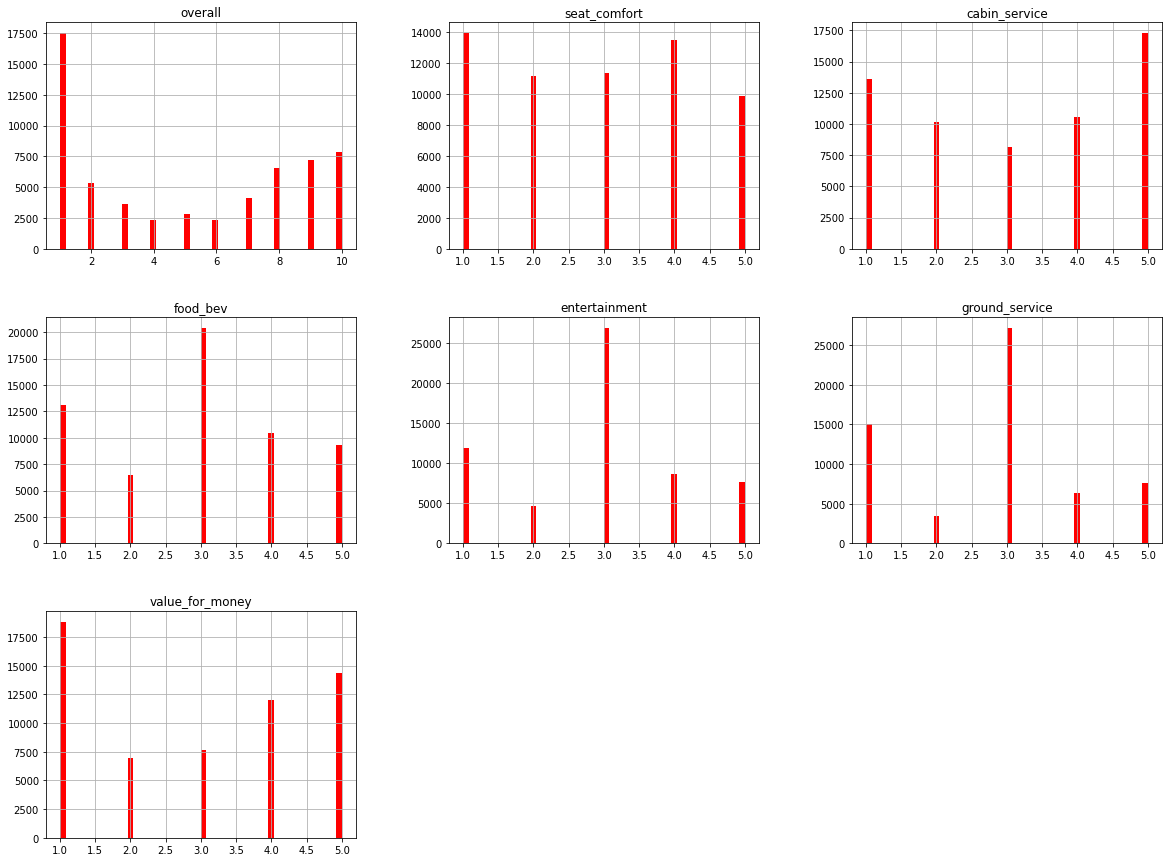

In [27]:
# correlation between using histgram
airline_df.hist(bins=50, figsize=(20,15),color = 'red')
plt.show()

From above plot

* The overall feature ratings of 1 to 2 occur more frequently. 
From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.


* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

#Trips made by each airline

In [28]:
# Get the number of trips each airline make.
trip_by_airlines = airline_df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2808
American Airlines     2756
United Airlines       2715
British Airways       2644
Emirates              1716
                      ... 
QantasLink             102
Adria Airways           83
Air Arabia              80
Tunisair                71
Thai Smile Airways      47
Name: airline, Length: 81, dtype: int64

Getting more visualized view of top 10 airlines trip through graph.

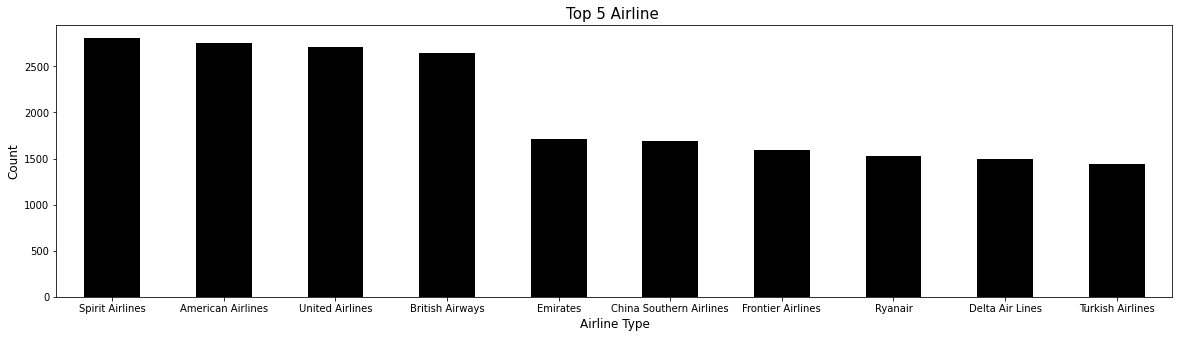

In [29]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'black')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 5 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

We have observed that the top 10 airlines with most trips are-

* Spirit Airlines  
* American Airlines 

* United Airlines 

* British Airways

* Emirates 

* china southern airline 

* frontier airlines 

* ryanair 

* delta air lines 

* turkish airlines

#Most recommended cabin type 

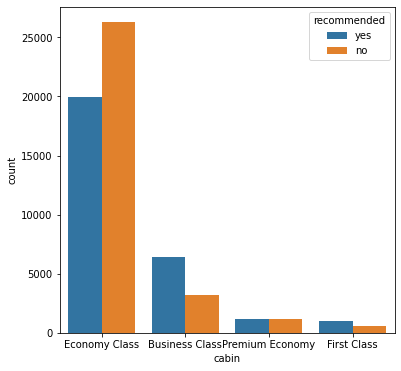

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'])

On the basis of graph -

* Economy class has highest recommendation with bad reviews.

* Business class has second most recommended cabin type with good reviews.

* premium economy has equal reviews.

* first class is least recommend cabin type with good reviews.

#Most common traveller type

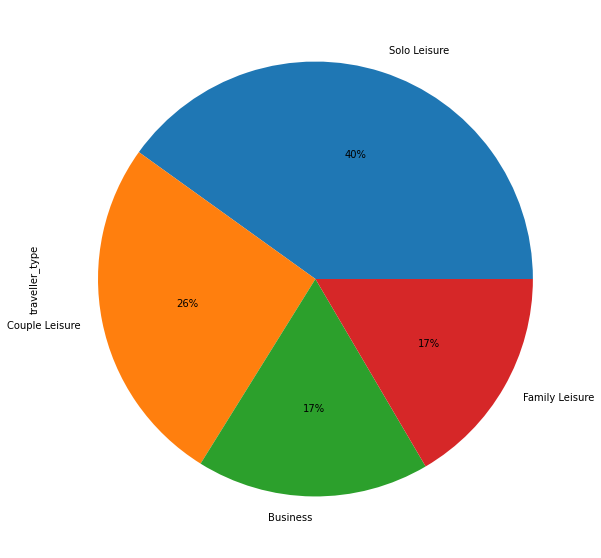

In [31]:
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
airline_df['traveller_type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

**Solo** is the most common traveller type followed by **Couple**.

Type of traveller with reviews-

Text(0.5, 1.0, 'Traveller Type Count Distribution')

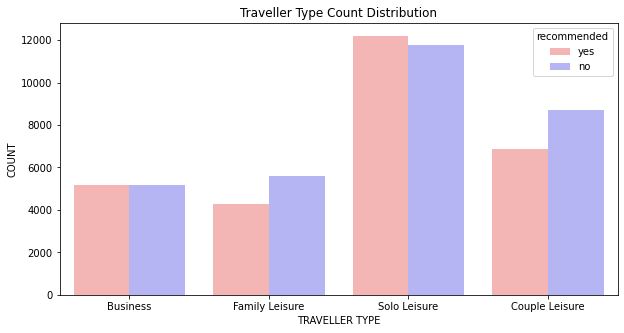

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x="traveller_type", hue="recommended", data=airline_df, palette="bwr_r")
plt.xlabel("TRAVELLER TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Traveller Type Count Distribution")

On the basis of graph -

* Solo leisure has highest recommendation with good reviews.

* Couple leisure  has second most recommended cabin type with bad reviews.

* Business  has equal reviews.

* Family leisure  is least recommend cabin type with bad reviews.

#Rating of food and entertainment given by passanger of diffrent class

In [33]:
#group food and entertainment column
food_etertaimet = airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
food_etertaimet

,cabin,food_bev,entertainment
0,Business Class,3.496142,3.299583
1,Economy Class,2.812577,2.830986
2,First Class,3.360966,3.230418
3,Premium Economy,2.926202,3.033582


Getting more preside view through graph-

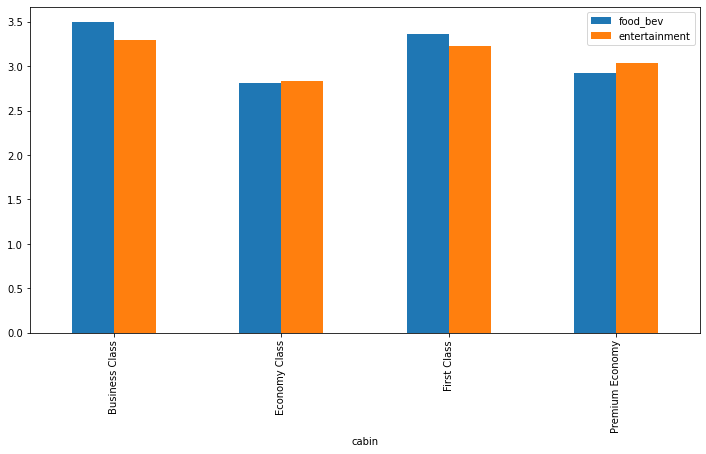

In [34]:
plt.rcParams['figure.figsize']=(12,6)
food_etertaimet.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.

#Exploring targeted variable 

In [35]:
recommend_value = airline_df['recommended'].value_counts()
recommend_value

no     31268
yes    28493
Name: recommended, dtype: int64

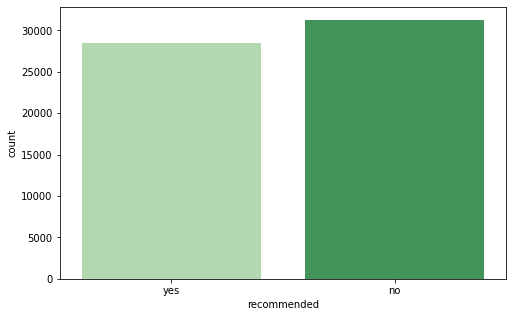

In [36]:
#looking at the graph of yes and no recommendedation
plt.figure(figsize=(8,5))
sns.countplot(x = 'recommended', data = airline_df , palette = "Greens")

There are more number of negative recommendation.

#**Correlation Heatmap**

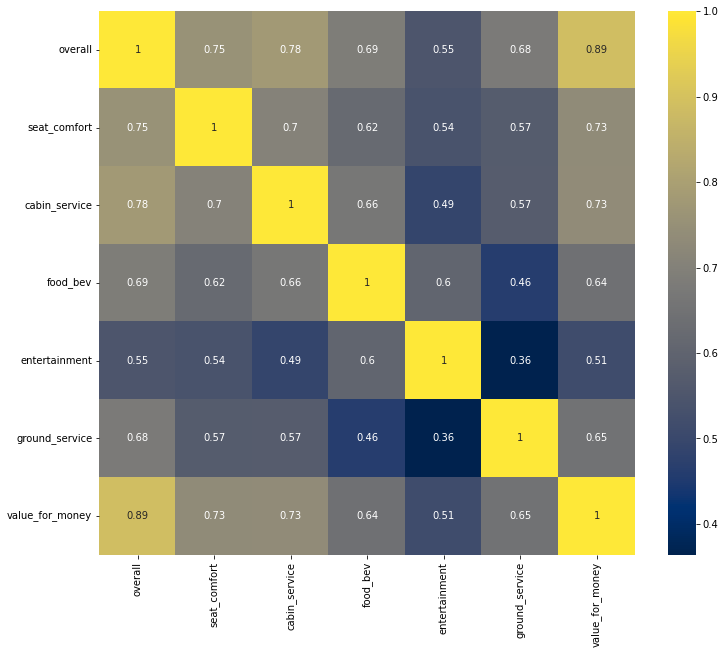

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True, cmap='cividis')

Drop overall column as it has highest correlation value than others.

In [38]:
#drop overall column 
airline_df.drop(["overall"], axis = 1, inplace = True)

#**Converting categorical data into numerical data**

In [39]:
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [40]:
airline_df.head(1)

,airline,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1


In [41]:
airline_df.drop(["airline"], axis = 1, inplace = True)

#**Defining the dependent and independent variables.**

In [42]:
#separating the dependent and independent variables
y = airline_df['recommended']
x = airline_df.drop(columns = 'recommended')

In [43]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

#**One hot encoding**

In [44]:
x = pd.get_dummies(x)

In [45]:
x.shape

(59761, 14)

In [46]:
x.head(1)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0


#**Splitting Train and Test Data**

In [47]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [48]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [49]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


#**1.Logistic Regression**

In [50]:
#logistic regression fitting 
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [51]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [52]:
y_pred = log_reg.predict(x_test)

In [53]:
#report of logistic regression 
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



**93%** accuracy with **Logistic Regression**

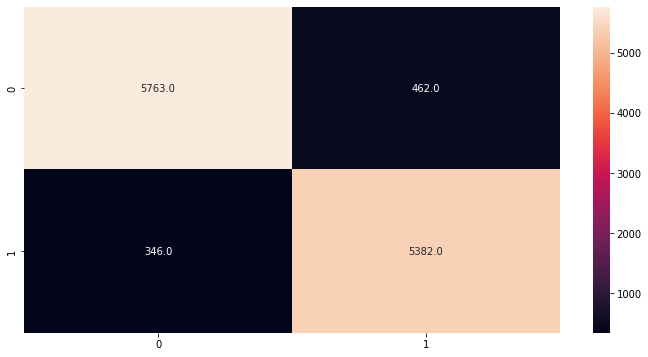

In [54]:
#cofusion matrix of logistic regression 
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

#Implementing Cross-validated Logistic Regression

In [55]:
logistic = LogisticRegression()

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [58]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

#**2.Decision tree**

In [59]:
#fitting decision tree classifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
#getting score through decision tree
dec_tree.score(x_test,y_test)

0.9177612314900025

**91%** accuracy with **Decision Tree**

In [61]:
y_pred = dec_tree.predict(x_test)

In [62]:
#report of decision tree 
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



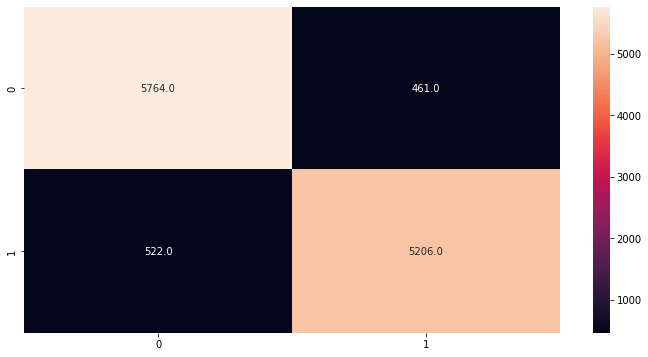

In [63]:
#cofusion matrix of decision tree 
confuse_matrix_dt = confusion_matrix(y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_dt, annot=True, fmt = ".1f")

#Implementing Cross-validated Decision Tree

In [64]:
#parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['accuracy']

In [65]:
#hyperparameter tuning using gridsearchcv
dec_tree_cv = GridSearchCV(estimator = dec_tree, param_grid = parameters, scoring = scoring_, cv = 5,refit = 'accuracy')

In [66]:
#fitting cv
dec_tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy', scoring=['accuracy'])

In [67]:
#best params
dec_tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [68]:
#best score
dec_tree_cv.best_score_

0.9371443495580213

#**3.Random Forest**

In [69]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
random_forest.score(x_test,y_test)

0.928386179201874

In [71]:
#report of decision tree 
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



**92%** accuracy with **Random Forest**

In [72]:
#cofusion matrix of decision tree 
confuse_matrix_ran_forest = confusion_matrix(y_test,y_pred)
confuse_matrix_ran_forest

array([[5764,  461],
       [ 522, 5206]])

#Implementing Cross-validated Random Forest

In [73]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [74]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   2.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [75]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

#**4.K-Nearest Neighbour Model**

In [76]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred = k_neighbor.predict(x_test)

In [78]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test) 
print(test_accuracy)

0.9493390227576974
0.9293901112691375


**92%** accuracy with **K-Nearest-Neighbor**

In [79]:
#cofusion matrix of k_neighbor  
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

array([[5815,  410],
       [ 434, 5294]])

In [80]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

#**5.Support Vector Machine**

In [81]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [82]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

In [83]:
y_pred = support_vector.predict(x_test)

In [84]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5747,  478],
       [ 337, 5391]])

#**6.Naïve Bayes Classifier**

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [87]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.9177543507362784

In [88]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [89]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369
